# An advanced example of lock: Symmetric functions

## In this example, we will consider fitting a symmetric function which we know in a prior that it is symmetric wrt to input variables, so we want to build in this symmetry into KAN.
$f(x,y)=xy + {\rm exp}({\rm sin}(\pi x)+{\rm sin}(\pi y))$

### intialize model and create dataset

In [11]:
from kan import KAN, create_dataset
import torch

# initialize KAN with G=3
model = KAN(width=[2,3,1], grid=5, k=3)

# create dataset
f = lambda x: x[:,[0]]*x[:,[1]] + torch.exp(torch.sin(torch.pi*x[:,[0]])+torch.sin(torch.pi*x[:,[1]]))
dataset = create_dataset(f, n_var=2)

### Train KAN and plot

In [12]:
model.fit(dataset, opt="LBFGS", steps=20);

train loss: 1.08e-02 | test loss: 1.31e-02 | reg: 9.98e+00 : 100%|█| 20/20 [00:0


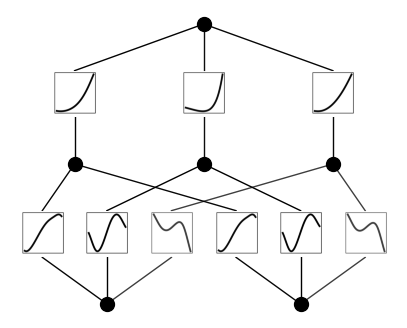

In [13]:
model.plot(beta=10)

### Even without knowing this function is symmetry wrt x & y, KAN diagrams clearly display such symmetry. We can now lock visually similar activation functions.

In [14]:
for i in range(3):
    model.lock(0,[[0,i],[1,i]])


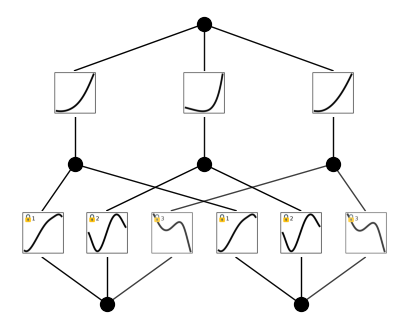

In [15]:
model.plot(beta=10)

### notice the number besides the lock symbols, indicating which locked group it belongs to. We now retrain the model.

In [16]:
model.fit(dataset, opt="LBFGS", steps=20);

train loss: 7.19e-03 | test loss: 7.77e-03 | reg: 9.79e+00 : 100%|█| 20/20 [00:0


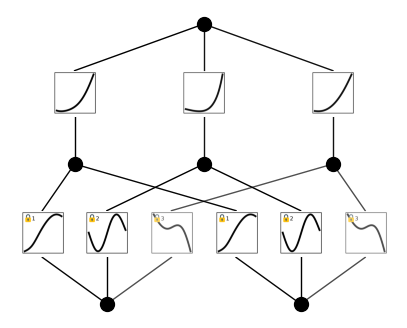

In [17]:
model.plot(beta=10)

### unfortunately, the model does not appear to be very symbolically interpretable immediately. We can snap the two osciallatory functions to be sine.

In [18]:
model.fix_symbolic(0,0,1,'sin')
model.fix_symbolic(0,1,1,'sin')

r2 is 0.9993783951693728
r2 is 0.999415962003563


tensor(0.9994)

In [21]:
model.fit(dataset, opt="LBFGS", steps=50);

train loss: 1.01e-03 | test loss: 1.07e-03 | reg: 1.01e+01 : 100%|█| 50/50 [00:1


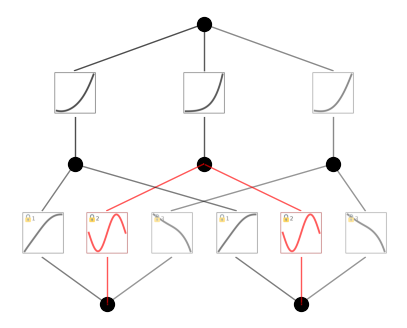

In [22]:
model.plot()

In [27]:
model = KAN(width=[2,3,1], grid=20, k=3).initialize_from_another_model(model, dataset['train_input'])

In [28]:
model.fit(dataset, opt="LBFGS", steps=50);

train loss: 4.81e-04 | test loss: 6.75e-04 | reg: 1.01e+01 : 100%|█| 50/50 [00:2


In [ ]:
# It shouldn't be purple. Copy is wrong.

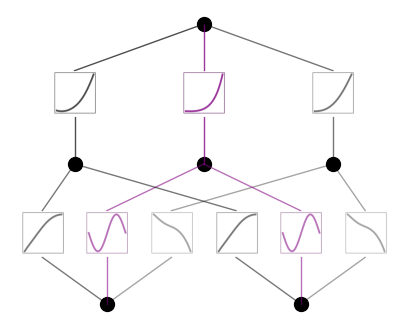

In [29]:
model.plot()

In [23]:
model.suggest_symbolic(1,1,0)

function , r2
cosh , 0.999970130164825
gaussian , 0.9999521805509436
tanh , 0.9999103486961142
sigmoid , 0.9999080213847577
exp , 0.999633407605388


('cosh',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.999970130164825)